In [78]:
# Load modules
import os
import pandas as pd
import json
import csv
import time
from dateutil.relativedelta import relativedelta
import datetime as dt
from psaw import PushshiftAPI # https://github.com/dmarx/psaw
from glob import glob
import matplotlib
import datetime as dt

import re


In [3]:
# Read in data

df_trpauthors = pd.read_csv("data/raw/trpred_scrape/authors_202005191336.csv")
df_trpposts = pd.read_csv("data/raw/trpred_scrape/trpposts_202005191336.csv")



In [4]:
# authors 
## need to transform followers into a number (currently have 1 follower, 16.4k followers)
## so need to take off the "followers" bit and multiply by 1000 if k is at the end

# Expression to extract number of followers
df_trpauthors['num_followers'] = df_trpauthors.followers.str.extract('(^\S+)')

# Replace K (or potentially M) with 000's (or 000,000's)
repl_dict = {'[kK]': '*1e3', '[mM]': '*1e6'}
df_trpauthors['num_followers'] = df_trpauthors['num_followers'].replace(repl_dict, regex = True).map(pd.eval).astype(int)


# Who are the top 10 (or 20? 25?) posters ... who are they in r/TRP?





In [5]:
df_trpauthors['num_followers']

0      16400
1          4
2          3
3          0
4         16
       ...  
784        0
785        2
786        6
787        2
788        2
Name: num_followers, Length: 789, dtype: int64

-Anteros-           2227
destraht            1790
GayLubeOil          1668
redpillschool       1655
LeashedDoggie        838
MentORPHEUS          776
Chaddeus_Rex         773
NazBolFren           672
TitusTorquatus       656
Caldero              614
jwayne               557
bloodexorcist        439
Osiris               396
tb87670              386
TopSperg             356
TheStoicCrane        349
Bukharin             340
RedRum               305
Legends_of_Men       280
clavabot             245
Rollo-Tomassi        222
assassin             210
JohannesFactotum     210
thechinaman          204
rKKKselected         204
Name: author, dtype: int64

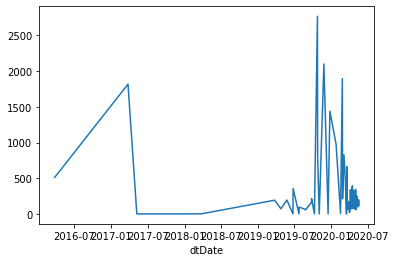

In [6]:
import matplotlib.pyplot as plt

# posts

# create date column
# Make date column datetime
df_trpposts['dtDate'] = pd.to_datetime(df_trpposts['timePosted']).dt.date

# Plot submissions
df_trpposts.groupby('dtDate').id.count().plot()
plt.savefig('trpred_scrape_posts.png', bbox_inches='tight')
# spikes in mid 2017, late 2019, early 2020

# Get mean of number of posts
df_trpposts.groupby('dtDate').id.count().mean()
## mean is ~280 a day

# Get range # of posts per day
postsmax = df_trpposts.groupby('dtDate').id.count().max()
postsmin = df_trpposts.groupby('dtDate').id.count().min()
postsrange = postsmax - postsmin
# max = 2769 posts
# min recorded = 1
# (trying to see what dates = 0)

# Get median # of posts per day
df_trpposts.groupby('dtDate').id.count().median()
# median is 143

# get key users 
top25 = df_trpposts.author.value_counts().nlargest(25)


# time coverage - posts / day

# descriptive stats on relevant columns
## get most common tribe
## get post with most comments
## get post with most likes



In [7]:
postsmax = df_trpposts.groupby('dtDate').id.count().max()
postsmin = df_trpposts.groupby('dtDate').id.count().min()
postsrange = postsmax - postsmin
postsrange

2768

In [8]:
from datetime import date, timedelta
d = df_trpposts['dtDate'].tolist()
date_set = set(min(df_trpposts['dtDate']) + timedelta(x) for x in range((max(df_trpposts['dtDate']) - min(df_trpposts['dtDate'])).days))
missing_dates = set(d).difference(set(date_set))


In [9]:
missing_dates = set(d).difference(set(date_set))

missing_dates

{NaT, datetime.date(2020, 5, 18)}

In [10]:
# Posts that don't have a post date (49 of them)
df_trpposts[df_trpposts.timePosted.isnull()]

,id,author,text,pic,commentsNo,likesNo,timeScraped,timePosted,timePrecision,parent,topLevelParent,tribe,dtDate
1242,3599,redpillschool,DON'T COMMUNICATE; LEAVE -- COMMUNICATION IS V...,NaN,1,5,2020-03-25 07:24:19.0,NaN,years,0,3599,FeedDailyPrescription,NaT
1279,3668,GayLubeOil,RedPill Super Star teaches you all you need to...,NaN,0,4,2020-03-25 07:23:32.0,NaN,years,0,3668,FeedDailyPrescription,NaT
1342,3807,redpillschool,Death of DAO [Link]\n\nvia SafeWordIsCommitmen...,NaN,1,3,2020-03-25 07:22:03.0,NaN,years,0,3807,FeedDailyPrescription,NaT
1360,3834,-Anteros-,"The phrase ""Toxic masculinity"" is meant to ins...",NaN,0,4,2020-03-25 07:21:48.0,NaN,years,0,3834,FeedDailyPrescription,NaT
1380,3866,-Anteros-,The herd mentality is real. [Link]\n\nvia The ...,NaN,0,2,2020-03-25 07:21:36.0,NaN,years,0,3866,FeedDailyPrescription,NaT
1428,3934,-Anteros-,Travel for women? International Carousel. Trav...,NaN,0,2,2020-03-25 07:20:11.0,NaN,years,0,3934,FeedDailyPrescription,NaT
1489,4071,-Anteros-,"Reminding fellas what women are like, one post...",NaN,0,1,2020-03-25 07:18:39.0,NaN,years,0,4071,FeedDailyPrescription,NaT
1503,4107,-Anteros-,Which came first? the harem or the conqueror? ...,NaN,1,3,2020-03-25 07:18:12.0,NaN,years,0,4107,FeedDailyPrescription,NaT
1557,4190,-Anteros-,"""A woman feels safe when she feels owned."" A t...",NaN,0,2,2020-03-25 07:17:07.0,NaN,years,0,4190,FeedDailyPrescription,NaT
1579,4222,-Anteros-,"Getting your needs met within a relationship, ...",NaN,0,1,2020-03-25 07:16:33.0,NaN,years,0,4222,FeedDailyPrescription,NaT


In [11]:
len(df_trpposts)

24965

In [12]:
# Plot submissions
test = df_trpposts.groupby('dtDate')  # see what's happening in 2020 

# df_trpposts.groupby('dtDate').id.count().plot()
# plt.savefig('trpred_scrape_posts.png', bbox_inches='tight')



In [27]:
df_trpposts.columns = df_trpposts.columns.str.strip()
count_bydate = pd.DataFrame(df_trpposts['dtDate'].value_counts())

In [163]:
count_bydate.index.name = 'date'
count_bydate.reset_index(inplace = True)


In [32]:
count_bydate = count_bydate.rename(columns={"dtDate" : "count"})


,date,count
date,,
0,2019-10-24,2769
1,2019-11-25,2100
2,2020-02-25,1895
3,2017-03-25,1818
4,2019-12-25,1440
...,...,...
84,2019-06-24,1
85,2019-11-02,1
86,2019-10-09,1


In [36]:
count_bydate[count_bydate['count'] == 1]

,date,count
date,,
83,2019-07-24,1
84,2019-06-24,1
85,2019-11-02,1
86,2019-10-09,1
87,2017-05-08,1
88,2020-03-17,1


In [42]:
count_bydate.set_index('date')
start_date = min(count_bydate['date'])
end_date = max(count_bydate['date'])


In [45]:
end_date - start_date 
# there are 1515 days between first post and last post, excl. last day

datetime.timedelta(days=1515)

In [50]:
pd.date_range(start = start_date, end = end_date).difference(count_bydate['date'])
# 1427 dates missing; so 1515 - 1427 = there are posts only on 88 days? cant be

DatetimeIndex(['2016-03-26', '2016-03-27', '2016-03-28', '2016-03-29',
               '2016-03-30', '2016-03-31', '2016-04-01', '2016-04-02',
               '2016-04-03', '2016-04-04',
               ...
               '2020-03-08', '2020-03-09', '2020-03-10', '2020-03-12',
               '2020-03-13', '2020-03-14', '2020-03-15', '2020-03-26',
               '2020-03-27', '2020-03-28'],
              dtype='datetime64[ns]', length=1427, freq=None)

In [54]:
len(set(count_bydate['date']))
# 89 unique values, so including last day, our first answer is right.

89

In [51]:
## FIND MISSING DATES BY MONTH -- SEE WHERE # DECREASES; THIS IS WHEN OUR DATA IS "GOOD"

88

In [70]:
# borrowed from https://stackoverflow.com/a/13565185
# as noted there, the calendar module has a function of its own
def last_day_of_month(any_day):
    next_month = any_day.replace(day=28) + dt.timedelta(days=4)  # this will never fail
    return next_month - dt.timedelta(days=next_month.day)

def monthlist(begin,end):

#     begin = dt.datetime.strptime(begin, "%Y-%m-%d") # commenting bc already in datetime
#     end = dt.datetime.strptime(end, "%Y-%m-%d") # commenting bc already in datetime

    result = []
    while True:
        if begin.month == 12:
            next_month = begin.replace(year = begin.year + 1,month = 1, day = 1)
        else:
            next_month = begin.replace(month = begin.month + 1, day = 1)
        if next_month > end:
            break
        result.append([begin.strftime("%Y-%m-%d"),last_day_of_month(begin).strftime("%Y-%m-%d")])
        begin = next_month
    result.append([begin.strftime("%Y-%m-%d"),end.strftime("%Y-%m-%d")])
    return result


date_list = monthlist(start_date, end_date)


In [72]:
type(date_list[0][0])
dt.strptime(war_start, '%Y-%m')

str

In [162]:
period_starts = [dt.datetime.strptime(pair[0], '%Y-%m-%d').strftime('%Y-%m') for pair in date_list]


,count
date,
2019-10-24,2769
2019-11-25,2100
2020-02-25,1895
2017-03-25,1818
2019-12-25,1440
...,...
2019-06-24,1
2019-11-02,1
2019-10-09,1


In [164]:
count_bymonth = count_bydate.set_index('date')

In [165]:
# list(count_bydate.index.values)
count_bymonth
len(date_list)

51

In [175]:
count_bymonth.sort_values('date', ascending = False)

,count
date,
2020-05-18,120
2020-05-17,191
2020-05-16,192
2020-05-15,199
2020-05-14,101
...,...
2019-03-25,193
2018-03-25,2
2017-05-08,1


In [199]:

ls_counts = []

for pair in date_list:
    begin_date = dt.datetime.strptime(pair[0], '%Y-%m-%d').date()
    begin_str = begin_date.strftime('%Y-%m')
    end_date = dt.datetime.strptime(pair[1], '%Y-%m-%d').date()
    
    prelim_count = [] # hold count values that appear by date
    
    for row in count_bymonth.itertuples():
#         print("row date: ", row.date) # for debugging
#         print("row count: ", row.count) # for debugging
        isAfterStart = row.Index >= begin_date # row.Index since date is index; otherwise, use row.date (if reinstate 'date' column)
#         print(isAfterStart)
        isBeforeEnd = row.Index <= end_date
#         print(isBeforeEnd)
#         print(isBeforeEnd)
        
        if isAfterStart == True & isBeforeEnd == True: 
#             print("correct time horizon")
            prelim_count.append(row.count)
#                 print("prelim count: " + str(prelim_count))
            
#             print(final_count)

#         else: 
#             final_count = 0
        
    final_count = sum(prelim_count)

    ls_counts.append(final_count)
#     print(ls_counts)
#     break
    

    

correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time horizon
correct time 

In [200]:
ls_counts

[512,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1818,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 193,
 73,
 195,
 357,
 98,
 120,
 374,
 3566,
 2101,
 1442,
 971,
 2114,
 2894,
 5207,
 2878]

In [201]:
count_dict = {'period_start' : period_starts, 'count': ls_counts}
counts_bymonth = pd.DataFrame(count_dict)
counts_bymonth

,period_start,count
0,2016-03,512
1,2016-04,0
2,2016-05,0
3,2016-06,0
4,2016-07,0
5,2016-08,0
6,2016-09,0
7,2016-10,0
8,2016-11,0
9,2016-12,0


In [202]:
counts_bymonth.sort_values('period_start')
## confirm that we get consistent post numbers from March 2019

,period_start,count
0,2016-03,512
1,2016-04,0
2,2016-05,0
3,2016-06,0
4,2016-07,0
5,2016-08,0
6,2016-09,0
7,2016-10,0
8,2016-11,0
9,2016-12,0


In [115]:
list(count_bydate.index.values)
# count_bydate[date_list[0][0]]

[datetime.date(2019, 10, 24),
 datetime.date(2019, 11, 25),
 datetime.date(2020, 2, 25),
 datetime.date(2017, 3, 25),
 datetime.date(2019, 12, 25),
 datetime.date(2020, 1, 25),
 datetime.date(2020, 3, 4),
 datetime.date(2019, 10, 25),
 datetime.date(2020, 3, 18),
 datetime.date(2016, 3, 25),
 datetime.date(2020, 3, 11),
 datetime.date(2020, 4, 15),
 datetime.date(2020, 4, 14),
 datetime.date(2019, 6, 25),
 datetime.date(2020, 5, 1),
 datetime.date(2020, 4, 5),
 datetime.date(2020, 4, 21),
 datetime.date(2020, 4, 25),
 datetime.date(2020, 4, 8),
 datetime.date(2020, 4, 23),
 datetime.date(2020, 5, 7),
 datetime.date(2020, 5, 9),
 datetime.date(2020, 4, 20),
 datetime.date(2020, 4, 10),
 datetime.date(2020, 4, 11),
 datetime.date(2019, 9, 25),
 datetime.date(2020, 2, 26),
 datetime.date(2020, 5, 15),
 datetime.date(2020, 5, 6),
 datetime.date(2019, 5, 25),
 datetime.date(2019, 3, 25),
 datetime.date(2020, 5, 16),
 datetime.date(2020, 4, 18),
 datetime.date(2020, 4, 27),
 datetime.date(20

In [100]:
dates_bymonth
    

,0
0,2016-03-01
1,2016-03-25
0,2016-03-01
1,2016-03-25
0,2016-04-01
...,...
1,2020-03-01
0,2020-04-01
1,2020-04-01
0,2020-05-01


In [82]:
date_list

[['2016-03-25', '2016-03-31'],
 ['2016-04-01', '2016-04-30'],
 ['2016-05-01', '2016-05-31'],
 ['2016-06-01', '2016-06-30'],
 ['2016-07-01', '2016-07-31'],
 ['2016-08-01', '2016-08-31'],
 ['2016-09-01', '2016-09-30'],
 ['2016-10-01', '2016-10-31'],
 ['2016-11-01', '2016-11-30'],
 ['2016-12-01', '2016-12-31'],
 ['2017-01-01', '2017-01-31'],
 ['2017-02-01', '2017-02-28'],
 ['2017-03-01', '2017-03-31'],
 ['2017-04-01', '2017-04-30'],
 ['2017-05-01', '2017-05-31'],
 ['2017-06-01', '2017-06-30'],
 ['2017-07-01', '2017-07-31'],
 ['2017-08-01', '2017-08-31'],
 ['2017-09-01', '2017-09-30'],
 ['2017-10-01', '2017-10-31'],
 ['2017-11-01', '2017-11-30'],
 ['2017-12-01', '2017-12-31'],
 ['2018-01-01', '2018-01-31'],
 ['2018-02-01', '2018-02-28'],
 ['2018-03-01', '2018-03-31'],
 ['2018-04-01', '2018-04-30'],
 ['2018-05-01', '2018-05-31'],
 ['2018-06-01', '2018-06-30'],
 ['2018-07-01', '2018-07-31'],
 ['2018-08-01', '2018-08-31'],
 ['2018-09-01', '2018-09-30'],
 ['2018-10-01', '2018-10-31'],
 ['2018-